In [1]:
import celerite2 as ct

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0,10,1000)

In [4]:
f_0 = 5

δ_m = 1
T_m = 5 #duration of transit
t_m = 3.5 #x position of middle of transit
τ_m = 0.1

δ_p = 3
T_p = 5
t_p = 4.5
τ_p = 0.25

δ_0 = 1
T_0 = 1.5
t_0 = 4
τ_0 = 0.25




In [5]:
def lin_lc(x):
    
    #eclipse egress
    if (T_0/2 - τ_0/2) < x-t_0 < (T_0/2 + τ_0/2):
        return f_0 - δ_0 + δ_p + δ_0/τ_0 * (-np.abs(x-t_0) - T_0/2 + τ_0/2)
    #eclipse ingress
    elif (T_0/2 - τ_0/2) < np.abs(x-t_0) < (T_0/2 + τ_0/2):
        return f_0 - δ_0 + δ_p+ δ_0/τ_0 * (-np.abs(x-t_0) - T_0/2 + τ_0/2)
    
    #eclipse
    elif np.abs(x-t_0) <= (T_0/2 - τ_0/2):
        return f_0-δ_m-δ_p+δ_0
    
    #planet egress
    elif (T_p/2 - τ_p/2) < x-t_p < (T_p/2 + τ_p/2):
        return f_0 - δ_p + δ_p/τ_p * (np.abs(x-t_p) - T_p/2 + τ_p/2)
    #planet ingress
    elif (T_p/2 - τ_p/2) < np.abs(x-t_p) < (T_p/2 + τ_p/2):
        return f_0 - δ_p - δ_m+ δ_p/τ_p * (np.abs(x-t_p) - T_p/2 + τ_p/2)
    
    #moon and planet transit
    elif np.abs(x-t_m) <= (T_m/2 - τ_m/2) and np.abs(x-t_p) <= (T_p/2 - τ_p/2):
        return f_0-δ_m-δ_p
    
    #moon egress
    elif (T_m/2 - τ_m/2) < x-t_m < (T_m/2 + τ_m/2):
        return f_0 - δ_m - δ_p+ δ_m/τ_m * (np.abs(x-t_m) - T_m/2 + τ_m/2)
    #moon ingress
    elif (T_m/2 - τ_m/2) < np.abs(x-t_m) < (T_m/2 + τ_m/2):
        return f_0 - δ_m + δ_m/τ_m * (np.abs(x-t_m) - T_m/2 + τ_m/2)
    
    #planet only transit
    elif np.abs(x-t_p) <= (T_p/2 - τ_p/2):
        return f_0-δ_p
    
    #moon only transit
    elif np.abs(x-t_m) <= (T_m/2 - τ_m/2):
        return f_0-δ_m
    
    #unocculted
    elif np.abs(x-t_m) >= (T_m/2 - τ_m/2):
         return f_0
    
    else: return 0

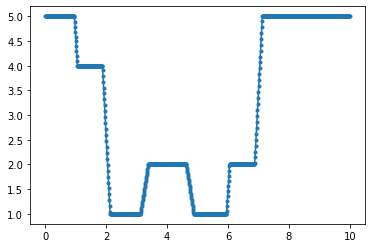

In [6]:

plt.plot(t, list(map(lin_lc, t)),marker='.');